# Sensitivity Analysis

We are going to use only three variables $I,\, P$ and $E$, each of them is a valid boolean string such that together they form a valid scenario (taking into account no more than 2 ones in each variable).

In [16]:
import pandas as pd
import sensitivity_analysis as sa
import matplotlib.pyplot as plt

## Creating input space
- $I$ and $P$ are boolean arrays of size three so that they have no 2 consecutive ones.
- $E$ is a boolean array of size 4. 

In total, there are $7*7*11=539$ possible scenarios.

In [2]:
num_options_per_category = {
    'investment' : 3,
    'policy' : 3,
    'event' : 4
}

In [3]:
input_space = sa.generate_input_space_bool(num_options_per_category)
input_space

[((0, 0, 0), (0, 0, 0), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 1, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 1, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 1, 0, 0)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 1, 0), (

### Input space maps (bool <-> decimal)

In [4]:
bool_to_dec_dicts = sa.input_space_bool_to_decimal_dicts(num_options_per_category)
bool_to_dec_dicts
bool_to_dec_dicts

{'investment': {(0, 0, 0): 0.0,
  (0, 0, 1): 0.16666666666666666,
  (0, 1, 0): 0.3333333333333333,
  (0, 1, 1): 0.5,
  (1, 0, 0): 0.6666666666666666,
  (1, 0, 1): 0.8333333333333334,
  (1, 1, 0): 1.0},
 'policy': {(0, 0, 0): 0.0,
  (0, 0, 1): 0.16666666666666666,
  (0, 1, 0): 0.3333333333333333,
  (0, 1, 1): 0.5,
  (1, 0, 0): 0.6666666666666666,
  (1, 0, 1): 0.8333333333333334,
  (1, 1, 0): 1.0},
 'event': {(0, 0, 0, 0): 0.0,
  (0, 0, 0, 1): 0.1,
  (0, 0, 1, 0): 0.2,
  (0, 0, 1, 1): 0.3,
  (0, 1, 0, 0): 0.4,
  (0, 1, 0, 1): 0.5,
  (0, 1, 1, 0): 0.6,
  (1, 0, 0, 0): 0.7,
  (1, 0, 0, 1): 0.8,
  (1, 0, 1, 0): 0.9,
  (1, 1, 0, 0): 1.0}}

In [5]:
dec_to_bool_dicts = sa.input_space_decimal_to_bool_dicts(num_options_per_category)

### Variance decomposition
We see this model as a function $f(X)=Y$, where the inputs are the scenarios, so $X\in\mathbb{R}^d$ and the output is a real value, that in our case, can be the emissions or the mobility choices. First, we are going to do an analysis on (overall) emissions and when we implement it, we can use the othe outputs.

The idea consists in estimating certain variances that we are going to define later in order to compute some sesitivity indices (there are first and second order sensitivity indices). We write
$$Var(Y)=\sum_{i=1}^dV_i+\sum_{i<j}^dV_{ij}+\ldots+V_{1,2, \ldots,d}$$where
$$V_i=Var_{x_i}(E_{X_{\sim i}}(Y|X))$$where the $X_{\sim i}$ notation means the set of all variables except $x_i$.

### First Order Index
$$S_i= \frac{V_i}{Var(Y)}$$We can interpret it as follows: "the fractional reduction in the variance of $Y$ which would be obtained on average if $X$ could be fixed".


## Estimating
To compute the variance, we can use the following estimator: $$Var_{x_i}(E_{X_{\sim i}}(Y|X))\approx \frac{1}{N}\sum_{i=1}^Nf(B)_j\left(f(A_B^i)_j-f(A)_j\right)$$

First, get outputs and then compute the variance

## Run Sensitivity Analysis Experiment
Multiple runs of computing the sensitivitiy indices for each category with a given number of samples.
Compute the mean and the 95% confidence interval for each category

In [6]:
num_samples = 100

In [7]:
num_runs = 1000

### Total Emissions

In [8]:
total_emissions_df = pd.read_csv("total_emissions.csv")
# df = pd.read_csv("all_metrics.csv")

In [9]:
sa_result_arrays = sa.sensitivity_analysis_runs(num_samples, num_runs, total_emissions_df, 'total_emissions')

In [17]:
sa_result_arrays[0]

array([-7.45932032e-01, -1.92716669e-01,  8.44126985e-01, -1.05448237e+00,
       -2.42650926e+00,  4.67676571e-01, -3.53285063e+00, -7.59705549e-01,
       -1.23021108e-01, -1.14601505e+00, -2.58867005e-01,  2.19391007e-01,
        1.00525736e+00, -6.81485032e-01,  6.08544294e-01,  2.62890680e+00,
        1.09336707e+00, -1.37428152e-01, -6.05105932e-01, -1.42177917e+00,
        4.68948671e-01, -7.95610483e-02,  5.36923001e-02,  1.85926359e+00,
       -1.01791277e-01, -8.01713179e-02, -1.72527193e-01,  4.89434152e-01,
        2.82410980e-01,  2.91457517e-01, -5.67322010e-01,  7.35489351e-01,
       -1.20935371e+00,  3.02917065e-01, -1.01213698e+00,  3.79436639e-01,
       -1.34620882e+00,  6.04806757e-01, -1.43838845e+00, -1.34108588e+00,
        3.17712893e-01,  3.23940412e-01,  1.90371036e+00,  1.18245018e+00,
       -1.02500466e+00, -4.68491061e-01, -2.59234152e-01,  2.23620312e+00,
       -6.79173195e-02,  3.50948631e-01,  3.08425254e+00, -4.84761513e-01,
       -1.40103000e-01, -

In [19]:
df_arrays = pd.DataFrame(sa_result_arrays[0], 
             columns=['investment'])

In [21]:
df_arrays['policy'] = sa_result_arrays[1]
df_arrays

,investment,policy
0,-0.745932,-9.930745
1,-0.192717,2.305099
2,0.844127,7.977562
3,-1.054482,-0.101012
4,-2.426509,-9.498487
...,...,...
995,-0.801415,-7.247714
996,1.403532,-15.998509
997,0.038790,3.423154
998,1.078263,11.586442


In [23]:
df_arrays['event'] = sa_result_arrays[2]
df_arrays

,investment,policy,event
0,-0.745932,-9.930745,0.915446
1,-0.192717,2.305099,-1.281323
2,0.844127,7.977562,2.063326
3,-1.054482,-0.101012,-0.187649
4,-2.426509,-9.498487,-2.950048
...,...,...,...
995,-0.801415,-7.247714,-0.388617
996,1.403532,-15.998509,0.295027
997,0.038790,3.423154,-4.014979
998,1.078263,11.586442,2.036275


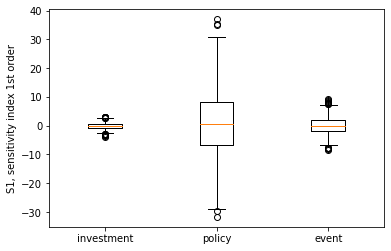

In [28]:
boxplot_cols = [df_arrays['investment'], df_arrays['policy'], df_arrays['event']]
fix, ax = plt.subplots()
ax.boxplot(boxplot_cols, labels=['investment', 'policy', 'event'])
ax.set_ylabel('S1, sensitivity index 1st order')
plt.show()

In [22]:
fixed_acidity = dataframe["fixed acidity"]
free_sulfur_dioxide = dataframe['free sulfur dioxide']
total_sulfur_dioxide = dataframe['total sulfur dioxide']
alcohol = dataframe['alcohol']

columns = [fixed_acidity, free_sulfur_dioxide, total_sulfur_dioxide, alcohol]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.show()

NameError: name 'dataframe' is not defined

In [10]:
sa_result_emissions = sa.sensitivity_analysis_experiment(num_samples, num_runs, total_emissions_df, 'total_emissions')

In [11]:
def create_results_dataframe(results):
    df_all_categories = []
    for category_str, stats in results.items():
        df_category = pd.DataFrame({'category': [category_str],
                                    'S1' : [stats['S1']],
                                    'S1_conf' : [stats['S1_conf']]})
        df_all_categories.append(df_category)
    df_SA = pd.concat(df_all_categories, ignore_index=True)
    return df_SA

In [12]:
df_SA_ex1 = create_results_dataframe(sa_result_emissions)
df_SA_ex1

,category,S1,S1_conf
0,investment,-0.011133,"(-0.07766518040226682, 0.05539979782976117)"
1,policy,1.144122,"(0.4336414347298554, 1.8546033862058469)"
2,event,-0.078429,"(-0.25157134532458564, 0.09471296804895081)"


### Stock_C

#### TODO: generate CSV that has a column for each metric that we want to use
e.g. 'total_emissions', 'stock_C', 'stock_E', 'stock_N', 'stock_P', & 'stock_s'

In [13]:
df = pd.read_csv("data.csv") # replace with generated CSV (see comment above)
sa_result_stock_C = sa.sensitivity_analysis_experiment(num_runs, df, 'stock_C', num_samples)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

### Stock_E

In [ ]:
sa_result_stock_E = sa.sensitivity_analysis_experiment(num_runs, df, 'stock_E', num_samples)

### Stock_N

In [ ]:
sa_result_stock_N = sa.sensitivity_analysis_experiment(num_runs, df, 'stock_N', num_samples)

### Stock_P

In [ ]:
sa_result_stock_P = sa.sensitivity_analysis_experiment(num_runs, df, 'stock_P', num_samples)

### Stock_S

In [ ]:
sa_result_stock_E = sa.sensitivity_analysis_experiment(num_runs, df, 'stock_E', num_samples)